<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex01_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자
- 딥러닝으로 이진분류 실습을 진행하자

In [46]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 사이킷런에 내장되어 있는 유방암 데이터 가져오기

In [47]:
# 데이터 불러오기
breast_data = load_breast_cancer()
print(breast_data)
# 머신러닝 데이터구조: 번치객체(딕셔너리 형태)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [48]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
# data:문제데이터, 입력특성
# target: 정답데이터
# target_names: 정답데이터의 이름

In [50]:
# 정답데이터 확인
breast_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
# 정답데이터 확인
breast_data.target_names
# 0 == 'malignant'(악성), 1 == 'begin'(양성)
# 클래스의 개수: 2개 -> 이진분류

array(['malignant', 'benign'], dtype='<U9')

In [52]:
breast_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [53]:
# 문제, 정답 분리
# 문제 X, 정답 y
X = breast_data['data']
y = breast_data['target']

In [54]:
# train, test 분리
from sklearn.model_selection import train_test_split
# train_test_split(test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 919)

In [55]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


### 모델링 과정
1. 신경망 구조 설계 (뼈대, 입력층, 중간층, 출력층)
2. 신경망 모델 학습/평가 방법 설정 (회귀, 분류)
3. 모델 학습
4. 모델 예측 및 평가

In [56]:
# 모델 생성을 위한 도구 불러오기
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense

In [57]:
# 1. 모델 구조 설계
# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(input_shape = (30,))) # 입력층 (입력특성의 개수)

# 중간층(은닉층)
model.add(Dense(units = 16, activation = "sigmoid"))
model.add(Dense(units = 8, activation = "sigmoid"))

# 출력층 출력받고싶은 형태 지정( 이진분류, 0-1사이 확률값 하나)
model.add(Dense(units = 1, activation = "sigmoid"))

In [58]:
# 2. 모델 학습 및 평가 방법 설정
model.compile(loss = 'binary_crossentropy', # 오차 : 이진분류 -> binary_crossentropy
              optimizer = 'SGD', # 최적화 알고리즘 (확률적 경사하강법)
              metrics = ['accuracy']) # 평가방법(분류:정확도)

In [59]:
h1 = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

Epoch 1/20
12/12 [==============================] - 1s 22ms/step - loss: 0.9031 - accuracy: 0.3544 - val_loss: 0.8330 - val_accuracy: 0.4066
Epoch 2/20
12/12 [==============================] - 0s 7ms/step - loss: 0.8533 - accuracy: 0.3544 - val_loss: 0.7919 - val_accuracy: 0.4066
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 0.8114 - accuracy: 0.3544 - val_loss: 0.7636 - val_accuracy: 0.4066
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.7798 - accuracy: 0.3544 - val_loss: 0.7398 - val_accuracy: 0.4066
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.7551 - accuracy: 0.3544 - val_loss: 0.7218 - val_accuracy: 0.4066
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.7330 - accuracy: 0.3544 - val_loss: 0.7126 - val_accuracy: 0.4066
Epoch 7/20
12/12 [==============================] - 0s 9ms/step - loss: 0.7162 - accuracy: 0.3544 - val_loss: 0.6923 - val_accuracy: 0.4066
Epoch 8/20
12/12 

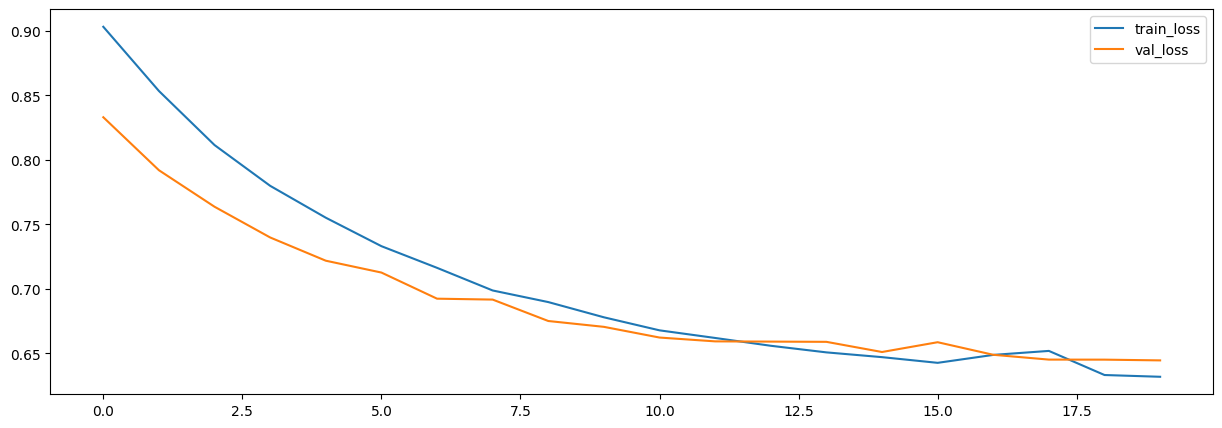

In [60]:
# 결과 시각화
plt.figure(figsize = (15, 5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [61]:
# 모델에 대한 전체적인 내부구조 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                496       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
